In [1]:
from cProfile import label
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Flatten
from datetime import *
from os import *
from dataprep import *
#path='C:\Users\bensa\OneDrive - Microsoft\Documents\MRPLocal\Data'
path= 'C:\\Users\\bensa\\OneDrive - Microsoft\\Documents\\MRPLocal\\Data'

c:\Users\bensa\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Next -- build out table of metrics and the runner
Write the metrics to a CSV for storage
Use an init for the first metric build

Run a few test runs to see what else we need to record.



Experiment Plans

Build out models to compare performance on
Look at hyperparameter tuning
ONce models are adequately baked, then move to A and B below

A Experiment on using different patients inputs and keeping track of metrics
B Experiment on using feature engineering and build out metrics further


Implement Data cleaning from development to the data helper functions
Add in ability to look at a per patient basis
Perhaps start with overall data size, and then with a % set to train v test


In [42]:
## Record the results
Execution_time = []
train_rmse_results = []
test_rmse_results=[]
run_id = []
sample_size=[]
epochs = []
batch_size=[]
optimizer=[]
layers=[]
forecast_distance_perf=[]
prev_readings=[]



In [25]:
## Simple RNN Model
## Initialize
model_name = 'SimpleRNN - Personal'
num_layers = 4
epochs_num = 15
batch_size_set = 20
optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



#SETUP THE STACK
model_rnn = Sequential()
model_rnn.add(SimpleRNN(150, activation='relu', input_shape=(number_readings,1)))
model_rnn.add(Dense(30))
model_rnn.add(Dense(10))
model_rnn.add(Dense(1))
#START THE RUN
print('\nRunning RNN model...')
start = datetime.now()

model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)

## determine why this is pushing out lists instead of an array


Running RNN model...
Epoch 1/15
110/110 [==============================] - 2s 6ms/step - loss: 29.1630 - root_mean_squared_error: 5.4003 - val_loss: 2.7776 - val_root_mean_squared_error: 1.6666
Epoch 2/15
110/110 [==============================] - 0s 4ms/step - loss: 3.6059 - root_mean_squared_error: 1.8989 - val_loss: 2.6606 - val_root_mean_squared_error: 1.6311
Epoch 3/15
110/110 [==============================] - 0s 4ms/step - loss: 3.5611 - root_mean_squared_error: 1.8871 - val_loss: 3.8193 - val_root_mean_squared_error: 1.9543
Epoch 4/15
110/110 [==============================] - 0s 4ms/step - loss: 3.7712 - root_mean_squared_error: 1.9420 - val_loss: 2.6136 - val_root_mean_squared_error: 1.6167
Epoch 5/15
110/110 [==============================] - 0s 4ms/step - loss: 3.2116 - root_mean_squared_error: 1.7921 - val_loss: 2.3174 - val_root_mean_squared_error: 1.5223
Epoch 6/15
110/110 [==============================] - 0s 4ms/step - loss: 3.0278 - root_mean_squared_error: 1.7401 - 

In [22]:
## LSTM Model
## Initialize
model_name = 'LSTM - Personal'
num_layers = 4
epochs_num = 20
batch_size_set = 25
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



#SETUP THE STACK
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', input_shape=(number_readings, 1),return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1))

#START THE RUN
print('\nRunning LSTM model...')
start = datetime.now()

model_lstm.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_lstm.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_lstm.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_lstm.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)




Running LSTM model...
Epoch 1/20
634/634 [==============================] - 9s 11ms/step - loss: 8.9778 - root_mean_squared_error: 2.9963 - val_loss: 4.6150 - val_root_mean_squared_error: 2.1483
Epoch 2/20
634/634 [==============================] - 7s 11ms/step - loss: 5.6557 - root_mean_squared_error: 2.3782 - val_loss: 4.8596 - val_root_mean_squared_error: 2.2044
Epoch 3/20
634/634 [==============================] - 7s 11ms/step - loss: 5.1714 - root_mean_squared_error: 2.2741 - val_loss: 5.1671 - val_root_mean_squared_error: 2.2731
Epoch 4/20
634/634 [==============================] - 7s 11ms/step - loss: 4.8557 - root_mean_squared_error: 2.2036 - val_loss: 5.7290 - val_root_mean_squared_error: 2.3935
Epoch 5/20
634/634 [==============================] - 7s 11ms/step - loss: 4.6862 - root_mean_squared_error: 2.1648 - val_loss: 5.8897 - val_root_mean_squared_error: 2.4269
Epoch 6/20
634/634 [==============================] - 7s 11ms/step - loss: 4.5688 - root_mean_squared_error: 2.1

In [19]:
## GRU Model
## Initialize
model_name = 'GRU - Personal'
num_layers = 4
epochs_num = 6
batch_size_set = 100
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(number_readings,1), return_sequences=True))
model_gru.add(GRU(20, activation='relu'))
model_gru.add(Dense(10))
model_gru.add(Dense(1))


#START THE RUN
print('\nRunning GRU model...')
start = datetime.now()

model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)



Running GRU model...
Epoch 1/6
138/138 [==============================] - 4s 10ms/step - loss: 21.9090 - root_mean_squared_error: 4.6807 - val_loss: 3.6665 - val_root_mean_squared_error: 1.9148
Epoch 2/6
138/138 [==============================] - 1s 8ms/step - loss: 3.3646 - root_mean_squared_error: 1.8343 - val_loss: 3.3190 - val_root_mean_squared_error: 1.8218
Epoch 3/6
138/138 [==============================] - 1s 8ms/step - loss: 2.9977 - root_mean_squared_error: 1.7314 - val_loss: 3.0481 - val_root_mean_squared_error: 1.7459
Epoch 4/6
138/138 [==============================] - 1s 7ms/step - loss: 2.8176 - root_mean_squared_error: 1.6786 - val_loss: 3.1077 - val_root_mean_squared_error: 1.7629
Epoch 5/6
138/138 [==============================] - 1s 7ms/step - loss: 2.7628 - root_mean_squared_error: 1.6622 - val_loss: 2.9985 - val_root_mean_squared_error: 1.7316
Epoch 6/6
538/538 [==============================] - 1s 2ms/step - loss: 2.6630 - root_mean_squared_error: 1.6319

traini

In [30]:

## CNN RNN
## Initialize
model_name = 'CNN - RNN'
num_layers = 4
epochs_num = 15
batch_size_set = 50
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK

model_cnn_rnn = Sequential()
model_cnn_rnn.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(number_readings,1)))
model_cnn_rnn.add(tf.keras.layers.MaxPooling1D((1)))
model_cnn_rnn.add(SimpleRNN(120, activation='relu', return_sequences=True))
#model_cnn_rnn.add(LSTM(10, activation='relu', return_sequences=True))
model_cnn_rnn.add(Flatten())
model_cnn_rnn.add(Dense(1))


#START THE RUN
print('\nRunning CNN RNN model...')
start = datetime.now()

model_cnn_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_cnn_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'CNN RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_cnn_rnn.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)



Running CNN RNN model...
Epoch 1/15
403/403 [==============================] - 5s 9ms/step - loss: 7.2989 - root_mean_squared_error: 2.7016 - val_loss: 5.0363 - val_root_mean_squared_error: 2.2442
Epoch 2/15
403/403 [==============================] - 3s 8ms/step - loss: 4.4570 - root_mean_squared_error: 2.1112 - val_loss: 4.7884 - val_root_mean_squared_error: 2.1882
Epoch 3/15
403/403 [==============================] - 4s 9ms/step - loss: 4.2042 - root_mean_squared_error: 2.0504 - val_loss: 4.4610 - val_root_mean_squared_error: 2.1121
Epoch 4/15
403/403 [==============================] - 3s 8ms/step - loss: 4.0461 - root_mean_squared_error: 2.0115 - val_loss: 4.8105 - val_root_mean_squared_error: 2.1933
Epoch 5/15
403/403 [==============================] - 3s 8ms/step - loss: 3.9426 - root_mean_squared_error: 1.9856 - val_loss: 4.4112 - val_root_mean_squared_error: 2.1003
Epoch 6/15
403/403 [==============================] - 4s 9ms/step - loss: 3.9215 - root_mean_squared_error: 1.9803

In [9]:
## GRU w Features Model
## Initialize
model_name = 'GRU - w Features'
num_layers = 4
epochs_num = 6
batch_size_set = 100
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequencesMulti(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(number_readings,2), return_sequences=True))
model_gru.add(GRU(20, activation='relu'))
model_gru.add(Dense(10))
model_gru.add(Dense(1))


#START THE RUN
print('\nRunning GRU model...')
start = datetime.now()

model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)

[array([[10.6,  3. ],
       [10.7,  3. ],
       [10.7,  3. ],
       [10.8,  3. ],
       [10.8,  3. ],
       [10.9,  3. ],
       [10.9,  3. ],
       [11.1,  3. ]]), array([[10.7,  3. ],
       [10.7,  3. ],
       [10.8,  3. ],
       [10.8,  3. ],
       [10.9,  3. ],
       [10.9,  3. ],
       [11.1,  3. ],
       [11.2,  3. ]]), array([[10.7,  3. ],
       [10.8,  3. ],
       [10.8,  3. ],
       [10.9,  3. ],
       [10.9,  3. ],
       [11.1,  3. ],
       [11.2,  3. ],
       [11.2,  4. ]]), array([[10.8,  3. ],
       [10.8,  3. ],
       [10.9,  3. ],
       [10.9,  3. ],
       [11.1,  3. ],
       [11.2,  3. ],
       [11.2,  4. ],
       [11. ,  4. ]]), array([[10.8,  3. ],
       [10.9,  3. ],
       [10.9,  3. ],
       [11.1,  3. ],
       [11.2,  3. ],
       [11.2,  4. ],
       [11. ,  4. ],
       [10.7,  4. ]]), array([[10.9,  3. ],
       [10.9,  3. ],
       [11.1,  3. ],
       [11.2,  3. ],
       [11.2,  4. ],
       [11. ,  4. ],
       [10.7,  4. ],
  

NameError: name 'Execution_time' is not defined

In [38]:
metrics_df = pd.DataFrame(list(zip(Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,
prev_readings))
    ,columns=['Execution_time','train_rmse_results','test_rmse_results','run_id','sample_size','epochs','batch_size','optimizer','layers','forecast_distance_perf',
'prev_readings'])

In [39]:
metrics_df

Execution_time  train_rmse_results  test_rmse_results  \
0         4.728382            1.907196           1.809604   
1         3.399170            2.621847           2.250072   
2         9.780235            1.631878           1.646727   
3        10.542180            2.527820           2.398921   
4         2.485615            1.690294           1.822002   
5       265.101226            2.424339           2.275815   
6        31.220543            1.445172           1.375273   
7         2.161728            1.718817           1.991829   
8         7.965084            1.520094           1.421939   
9        32.810517            2.003528           1.995407   
10       57.233281            2.069984           2.040774   

                                            run_id  sample_size  epochs  \
0         GRU - Personal2022-08-03 21:51:34.005531         8191       6   
1         GRU - Personal2022-08-03 21:51:52.171455         3519       6   
2         GRU - Personal2022-08-03 21:52:26.058570        17189       6   
3        LSTM - Personal2022-08-03 21:53:06.959348         4827       8   
4   SimpleRNN - Personal2022-08-03 21:53:24.429301         3050       8   
5        LSTM - Personal2022-08-03 21:58:20.952438        19790      20   
6   SimpleRNN - Personal2022-08-03 21:59:00.527202         9594      15   
7   SimpleRNN - Personal2022-08-03 22:00:06.228717          952      15   
8   SimpleRNN - Personal2022-08-03 22:00:45.531556         2728      15   
9              CNN - RNN2022-08-04 07:14:34.424036        28888       6   
10             CNN - RNN2022-08-04 07:16:12.587543        25148      15   

    batch_size                                          optimizer  layers  \
0          200                                               adam       4   
1          200                                               adam       4   
2          100                                               adam       4   
3          100                                               adam       4   
4           80  <keras.optimizer_v2.adam.Adam object at 0x0000...       4   
5           25                                               adam       4   
6           25  <keras.optimizer_v2.adam.Adam object at 0x0000...       4   
7           50  <keras.optimizer_v2.adam.Adam object at 0x0000...       4   
8           20  <keras.optimizer_v2.adam.Adam object at 0x0000...       4   
9          100                                               adam       4   
10          50                                               adam       4   

    forecast_distance_perf  prev_readings  
0                        6              8  
1                        6              8  
2                        6              8  
3                        6              8  
4                        6              8  
5                        6              8  
6                        6              8  
7                        6              8  
8                        6              8  
9                        6              8  
10                       6              8

In [41]:
filename='metrics_full.csv'
metrics_file = os.path.join(path, filename)
## Load all previously generate metrics
all_history = pd.read_csv(metrics_file)
all_history.drop('Unnamed: 0',axis=1,inplace=True)

## Concatenate all metrics
full_metrics=pd.concat([all_history,metrics_df])
full_metrics.to_csv(metrics_file)
## Write complete DF back to original File
#drop recorded results




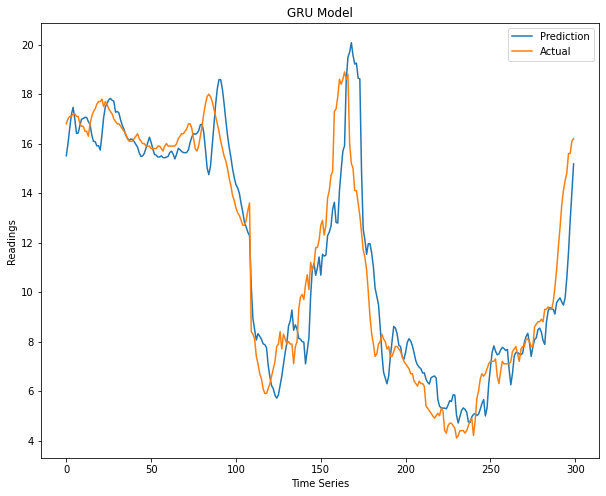

In [15]:

y_pred = model_gru.predict(X_test)
plt.figure(figsize=(10,8))
plt.plot(range(len(y_pred[:300])),y_pred[:300], label='Prediction')
plt.plot(y_test[:300], label='Actual')
plt.xlabel('Time Series')
plt.ylabel('Readings')
plt.title('GRU Model')
plt.legend()
plt.show()